# Deutsch-Jozsa Algorithm

**Course**: Quantum Computing Laboratory
**Version**: 2.2
**Last Updated**: November 2025

---

Demonstrates quantum advantage: solve in ONE query what classically requires multiple queries.

## Theory

Given: Black-box function f:{0,1}ⁿ → {0,1}
Determine: Is f constant or balanced?
- **Constant**: same output for all inputs
- **Balanced**: half 0s, half 1s

**Classical**: Need 2ⁿ⁻¹+1 queries
**Quantum**: Need 1 query!

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

print('✓ Qiskit 2.2 ready')

✓ Qiskit 2.2 ready


## Implementation

Circuit depth: 7


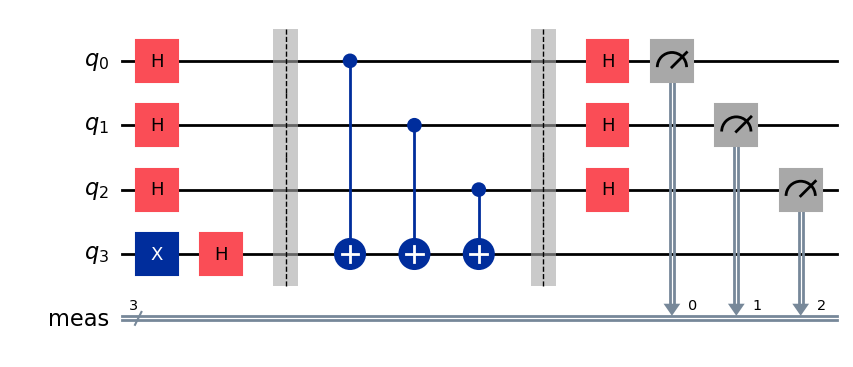

In [6]:
def deutsch_jozsa(n, oracle_type='balanced'):
    qr = QuantumRegister(n+1, 'q')
    cr = ClassicalRegister(n, 'meas')
    qc = QuantumCircuit(qr, cr)
    
    # Initialize
    qc.x(n)  # Ancilla to |1⟩
    qc.h(range(n+1))  # All to superposition
    qc.barrier()
    
    # Oracle
    if oracle_type == 'balanced':
        for i in range(n):
            qc.cx(i, n)
    # (constant oracle = identity)
    
    qc.barrier()
    qc.h(range(n))  # Hadamard
    qc.measure(range(n), range(n))
    
    return qc

# Test
qc = deutsch_jozsa(3, 'balanced')
print(f'Circuit depth: {qc.depth()}')
qc.draw('mpl')

## Execute

Results:
  Function is BALANCED ✓


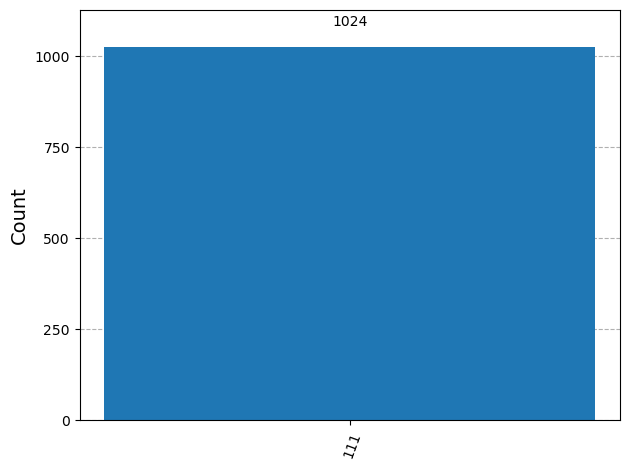

In [7]:
simulator = AerSimulator()
sampler = SamplerV2()
pm = generate_preset_pass_manager(optimization_level=1, backend=simulator)
transpiled = pm.run(qc)

job = sampler.run([transpiled], shots=1024)
result = job.result()
counts = result[0].data.meas.get_counts()

print('Results:')
if '000' in counts and counts['000'] > 900:
    print('  Function is CONSTANT ✓')
else:
    print('  Function is BALANCED ✓')
    
plot_histogram(counts)

## Analysis

**Key Result**: Measurement of all 0s → constant, otherwise → balanced

**Quantum Advantage**: 1 query vs exponential classical queries

---

**Version**: 2.2.0  
**License**: MIT